# 23. UL - Capstone

### Predicting Marketing Strategy by Using Credit Card Holders Usage Habit

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file has 18 behavioral variables. This capstone explores to spending habits of the credit cared holders


* CUST_ID : Identification of Credit Card holder (Categorical) 
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
* PURCHASES : Amount of purchases made from account 
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go 
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment 
* CASH_ADVANCE : Cash in advance given by the user 
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 
* PURCHASES_TRX : Numbe of purchase transactions made 
* CREDIT_LIMIT : Limit of Credit Card for user 
* PAYMENTS : Amount of Payment done by user * 
* MINIMUM_PAYMENTS : Minimum amount of payments made by user 
* PRCFULLPAYMENT : Percent of full payment paid by user 
* TENURE : Tenure of credit card service for user


###### showing all rows and columns 
- pd.set_option('display.max_columns', 500)
- pd.set_option('display.max_rows', 500)

#### check code before submission
http://pep8online.com/

In [1]:
### importing all libraries

import random
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
%matplotlib inline 

from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# These two lines let you show all the columns and rows
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

random.seed(3)

## Load the dataset

In [2]:
# Load single data-file
### For grading, data can be found here: https://www.kaggle.com/arjunbhasin2013/ccdata
df_temp = pd.read_csv('credit_card_data.csv')

In [3]:
# lets look at some data to see how they look
df_temp.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

The credit card data consists of
- 8950 rows
- 18 columns

In [5]:
### Customer ID is not needed so dropping
df_temp.drop("CUST_ID", axis = 1, inplace = True)

In [6]:
## Do we have any missing values?
df_temp.isnull().sum()*100/df_temp.isnull().count()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [7]:
#df_temp.isna().sum()
df_temp.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

Looks like there are not a lot of missing values.
Also I am at a disadvantage since I don’t have a lot of data, only 8K rows. So I rather not drop missing values but rather take care of them using mean of the column

In [8]:
### Lets take care of null values by using the mean()
min_payment_mean = df_temp['MINIMUM_PAYMENTS'].mean()
credit_limit_mean = df_temp['CREDIT_LIMIT'].mean()
df_temp['MINIMUM_PAYMENTS'].fillna(value = min_payment_mean, inplace = True)
df_temp['CREDIT_LIMIT'].fillna(value = credit_limit_mean, inplace = True)

In [9]:
### Checking to see if null values are taken care of
df_temp.isnull().sum()*100/df_temp.isnull().count()

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

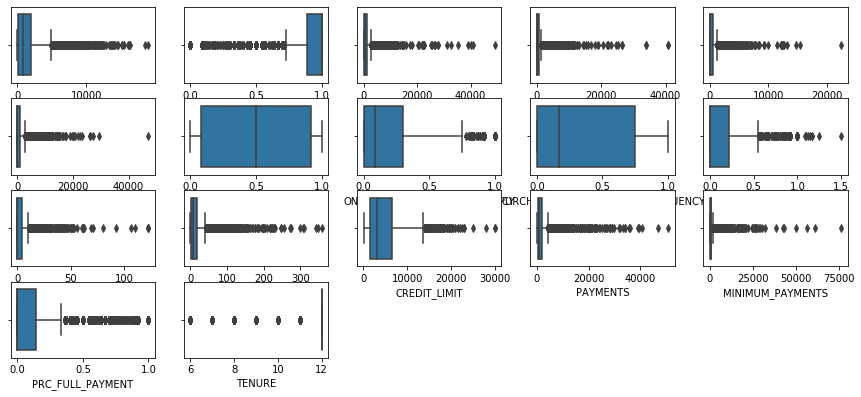

In [10]:
#Outlier detection
plt.figure(figsize=(15,25))
for n, i in enumerate(df_temp):
    n=n+1
    plt.subplot(15,5,n)
    sns.boxplot(df_temp[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16774c10>,
      dtype=object)

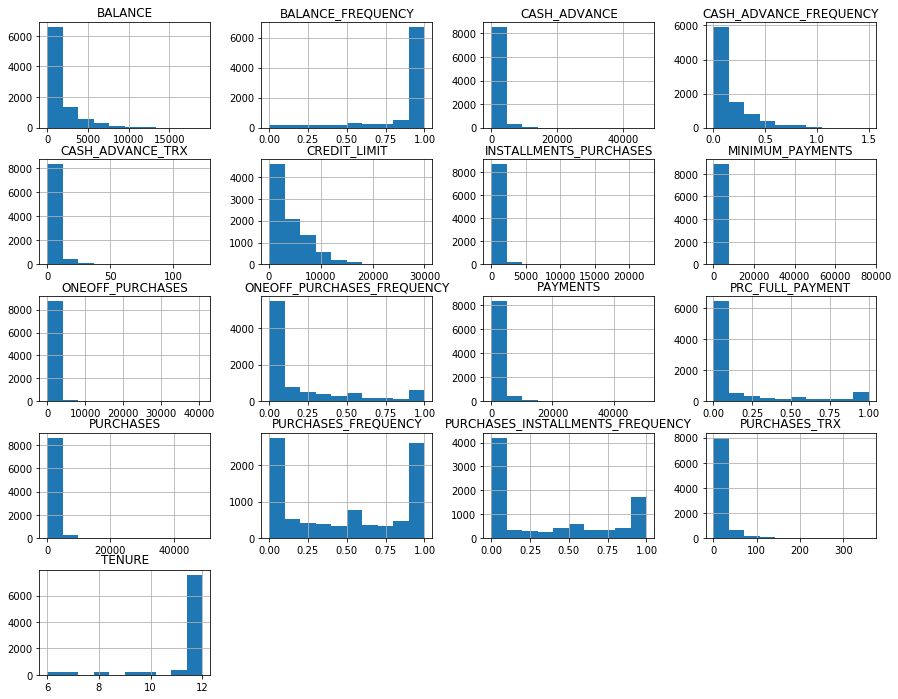

In [13]:
df_temp.hist(figsize=(15, 12))

In [11]:
#dealing with the outliers: lets see how the see scores look like and if we an remove some using that
from scipy import stats
z = np.abs(stats.zscore(df_temp))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.31096755 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08931021 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10166318 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33546549 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34690648 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33294642 0.52555097 4.12276757]]


In [12]:
### save the original data
data_orig = df_temp.copy()

In [14]:
### what if we drop the outliers?
df_temp_outlier_free = pd.DataFrame(df_temp[(z < 3).all(axis=1)], columns = df_temp.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a185c0610>,
      dtype=object)

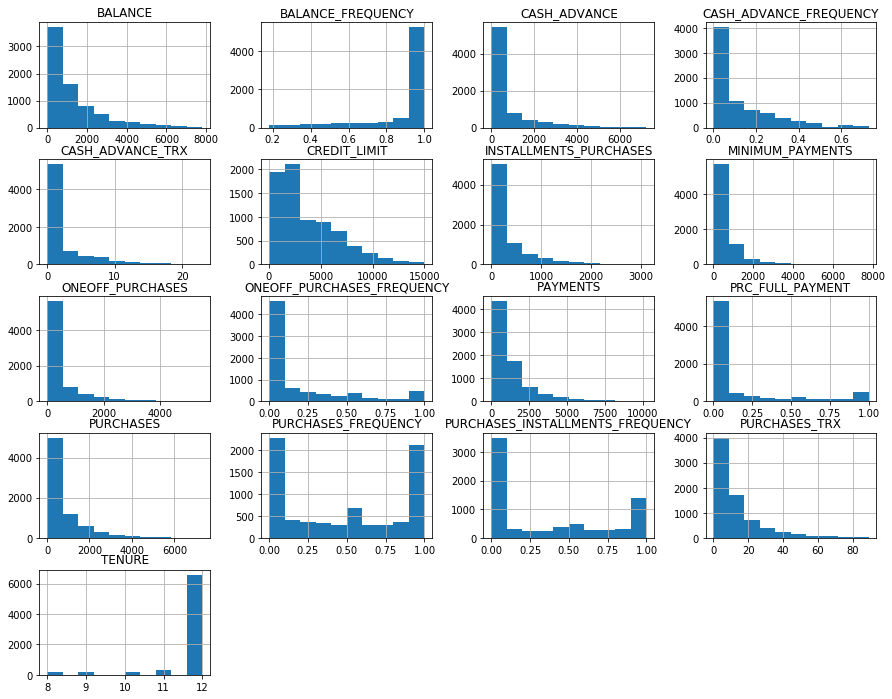

In [15]:
df_temp_outlier_free.hist(figsize=(15, 12))

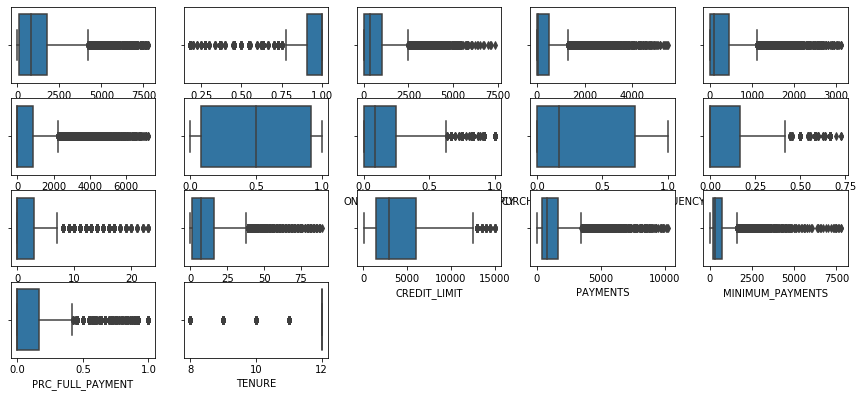

In [16]:
#Outlier detection
plt.figure(figsize=(15,25))
for n, i in enumerate(df_temp_outlier_free):
    n=n+1
    plt.subplot(15,5,n)
    sns.boxplot(df_temp_outlier_free[i])

In [17]:
df_temp_outlier_free.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,1269.831784,0.889646,753.123265,431.275673,322.112279,671.957249,0.485746,0.192344,0.357495,0.109677,2.314501,12.057842,3999.597543,1297.565656,588.090784,0.154570,11.750740
std,1517.952340,0.213397,1025.441760,793.561465,506.012658,1235.334487,0.396350,0.287619,0.392628,0.158778,3.941055,15.120242,2935.900739,1436.498465,776.407375,0.290825,0.798485
min,0.001214,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,8.000000
25%,120.946159,0.909091,46.687500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.216308,167.947384,0.000000,12.000000
50%,790.090769,1.000000,360.955000,35.000000,88.915000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,797.938345,291.135341,0.000000,12.000000
75%,1750.662783,1.000000,1023.372500,520.000000,443.250000,889.266455,0.916667,0.250000,0.750000,0.166667,3.000000,16.000000,6000.000000,1626.296448,736.779962,0.166667,12.000000
max,7803.071972,1.000000,7323.380000,5497.040000,3119.280000,7232.069823,1.000000,1.000000,1.000000,0.727273,23.000000,89.000000,15000.000000,10226.601760,7781.671432,1.000000,12.000000


In [ ]:
#Outlier detection
plt.figure(figsize=(15,25))
for n, i in enumerate(df_temp_outlier_free):
    n=n+1
    plt.subplot(15,5,n)
    sns.boxplot(df_temp_outlier_free[i])

In [19]:
### Lets save the original data - we will need it later to see which cluster it belongs to 
### and how the mean for that cluster look like
df_cc_orig = df_temp_outlier_free.copy()

In [20]:
df_cc_boxcox = df_temp_outlier_free.copy()

In [21]:
### want to see if boxcox will make a difference
numerical = numeric_columns = df_cc_boxcox.select_dtypes(['int64','float64']).columns
for i in numerical:
    if df_cc_boxcox[i].min() > 0:
        transformed, lamb = boxcox(df_cc_boxcox.loc[df_cc_boxcox[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_cc_boxcox.loc[df_cc_boxcox[i].notnull(), i] = transformed

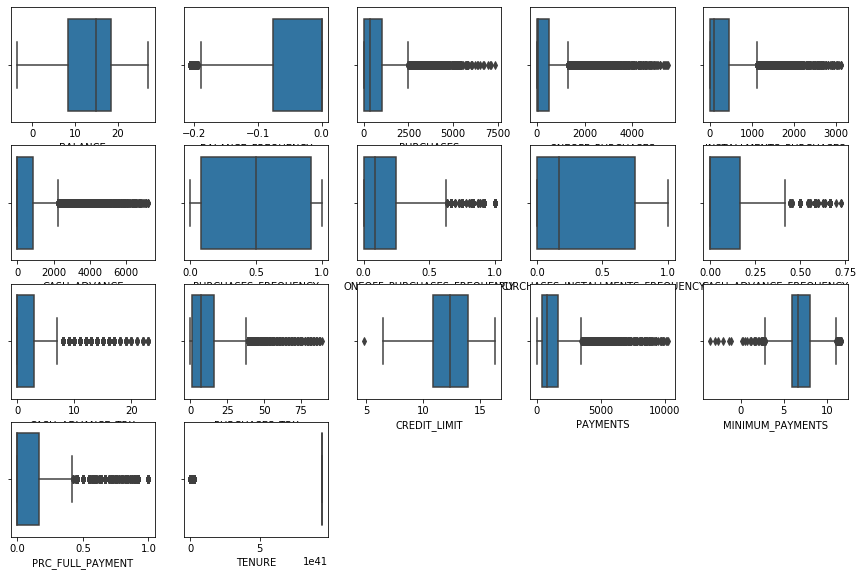

In [22]:
#Outlier detection

plt.figure(figsize=(15,25))
for n, i in enumerate(df_cc_boxcox):
    n=n+1
    plt.subplot(10,5,n)
    sns.boxplot(df_cc_boxcox[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19fc9490>,
      dtype=object)

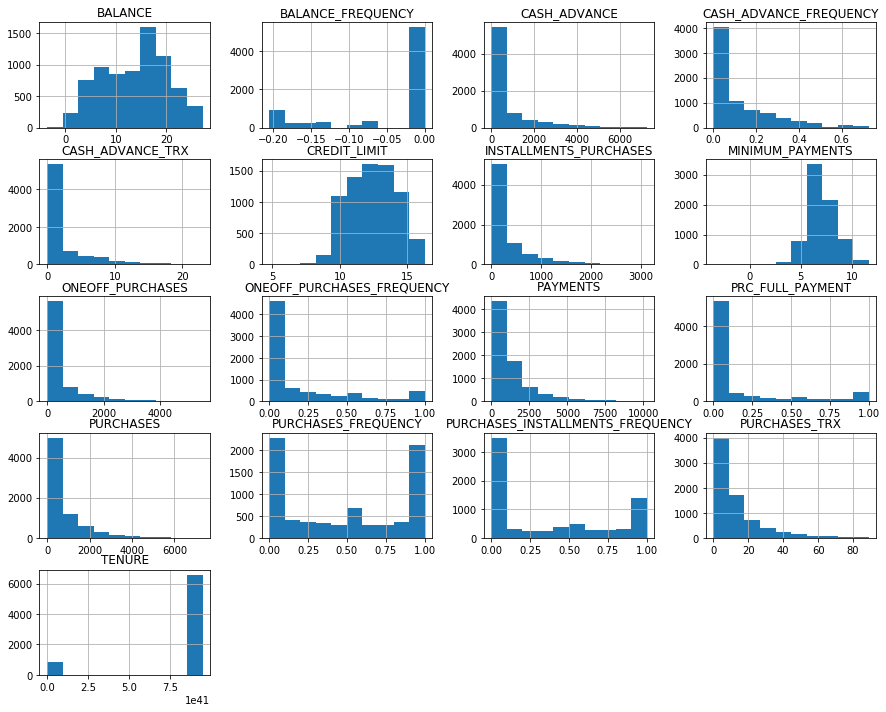

In [23]:
df_cc_boxcox.hist(figsize=(15, 12))

Data looks a bit better than before

so now we have 3 dataframes
- df_cc_boxcox - that's with box cox and rows dropped
- df_temp_outlier_free with just outliers dropped
- df_cc_orig -> original with just outliers removed (at this moment same asdf_temp_outlier_free)

- Which columns are interesting and is there a need to drop any columns?
* Looks like Tenure is not very useful. There is not much variance in the data when we look at that column
* BALANCE_FREQUENCY is also another column that can br dropped
* PRC_FULL_PAYMENT  will also be dropped

After looking at the data, it seems like these features would not contribute much in determinding the spending habit of the credit card holders and would be be much useful in figureing out what and how to market to the credit card holders.

In [24]:
### These columns are not needed so dropping
df_cc_boxcox.drop("TENURE", axis = 1, inplace = True)
df_cc_boxcox.drop("BALANCE_FREQUENCY", axis = 1, inplace = True)
df_cc_boxcox.drop("PRC_FULL_PAYMENT", axis = 1, inplace = True)

In [25]:
### These columns are not needed so dropping
df_temp_outlier_free.drop("TENURE", axis = 1, inplace = True)
df_temp_outlier_free.drop("BALANCE_FREQUENCY", axis = 1, inplace = True)
df_temp_outlier_free.drop("PRC_FULL_PAYMENT", axis = 1, inplace = True)

In [26]:
### need to remove it from the original dataset as well - the one before boxcox
df_cc_orig.drop("TENURE", axis = 1, inplace = True)
df_cc_orig.drop("BALANCE_FREQUENCY", axis = 1, inplace = True)
df_cc_orig.drop("PRC_FULL_PAYMENT", axis = 1, inplace = True)

### Data Preprocessing
* Standarizing the Data
    - I will standardize the data so I can use it with K means model. Since I am trying to segment the credit card users, Kmeans will be the good clustering algorithm to use
* How many clusters
* Reducing the dimension of the data

I am going to use my regular non-boxcox data as well as box cox data and use both with my model to see how the model does. This is because past projects have shown that boxcox sometimes tend to not handle the data well


In [27]:
### standardising the data
scaler = StandardScaler()
data_standardized_boxcox = scaler.fit_transform(df_cc_boxcox)

In [28]:
### standardising the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df_temp_outlier_free)

### K means
- Takes a predetermined number of clusters.
- Finds the centroids for each of these clusters, essentially the means.
- Assigns each data point to its nearest cluster based on the squared Euclidean distance.
- Once trained clusters for new unseen data points can be identified based on Euclidean distance.

### How many clusters
* For k means algorithm of clustering we need a method to know the number of clusters. We can do this by
- using dendograms
- Elbow method 
- Silhoutte method
We will be using elbow method first and see how we do

#### Elbow Criterion Method:

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

In [29]:
#using elbow method to determine the clusters
#consider upto 30 clusters
num_clusters = 30
n_inertias = np.zeros((1, num_clusters))
from sklearn.cluster import KMeans
for i in range(0, num_clusters):
    k_means = KMeans(i+1)
    k_means.fit(data_standardized)
    n_inertias[0, i] = k_means.inertia_

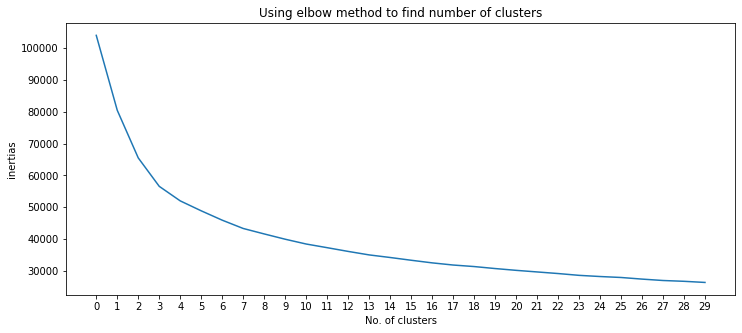

In [30]:
plt.figure(figsize =  (12, 5))
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.draw()

In [31]:
#using elbow method to determine the clusters
#consider upto 30 clusters
num_clusters = 30
n_inertias = np.zeros((1, num_clusters))
from sklearn.cluster import KMeans
for i in range(0, num_clusters):
    k_means = KMeans(i+1)
    k_means.fit(data_standardized_boxcox)
    n_inertias[0, i] = k_means.inertia_

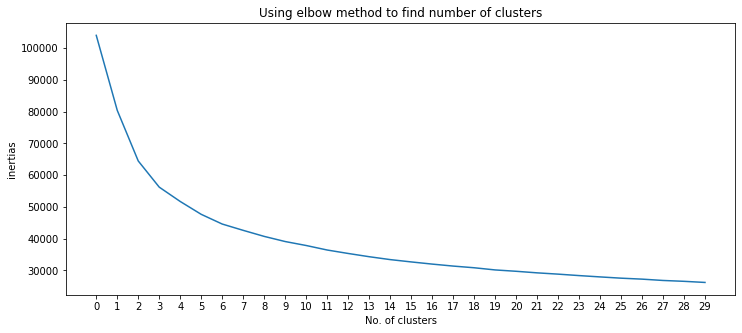

In [32]:
plt.figure(figsize =  (12, 5))
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.draw()

The elbow here is ambigious. It could be at 6, 7, 8, or even 9... so we will use Silhouette method - Reading from here 
* https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb.
* https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6
- The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

#### Silhouette Coefficient Method:

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

The mean distance between a sample and all other points in the same class.
The mean distance between a sample and all other points in the next nearest cluster.

In [33]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

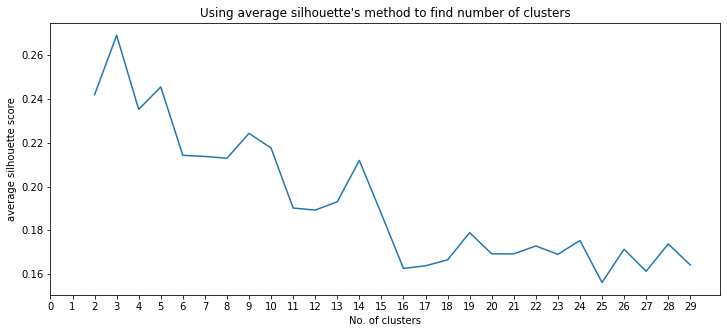

In [34]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized_boxcox)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized_boxcox, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

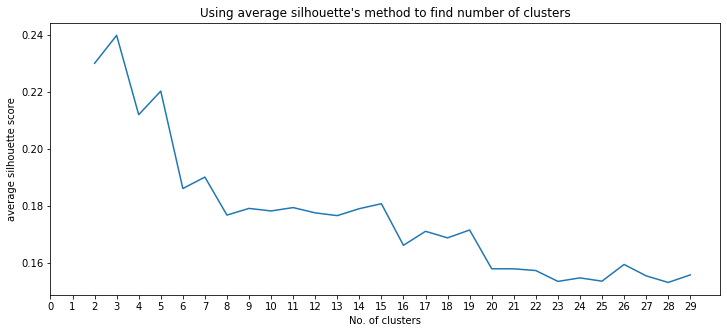

In [36]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

There is a clear peak at 3 so 3 may be the optimal cluster. 

In [37]:
### might be good to see the solhouette score for the different clusters to actually
### see if 3 clusters are good or not - let look at 10 clusters
for cluster in range(2,12):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(data_standardized, kmeans, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.242
Silhouette score for 3 cluster k-means: 0.269
Silhouette score for 4 cluster k-means: 0.236
Silhouette score for 5 cluster k-means: 0.246
Silhouette score for 6 cluster k-means: 0.210
Silhouette score for 7 cluster k-means: 0.213
Silhouette score for 8 cluster k-means: 0.216
Silhouette score for 9 cluster k-means: 0.226
Silhouette score for 10 cluster k-means: 0.187
Silhouette score for 11 cluster k-means: 0.192


In [38]:
for cluster in range(2,12):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(data_standardized_boxcox)
    sil_score = metrics.silhouette_score(data_standardized_boxcox,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(data_standardized_boxcox, kmeans, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.230
Silhouette score for 3 cluster k-means: 0.240
Silhouette score for 4 cluster k-means: 0.212
Silhouette score for 5 cluster k-means: 0.220
Silhouette score for 6 cluster k-means: 0.186
Silhouette score for 7 cluster k-means: 0.190
Silhouette score for 8 cluster k-means: 0.189
Silhouette score for 9 cluster k-means: 0.186
Silhouette score for 10 cluster k-means: 0.178
Silhouette score for 11 cluster k-means: 0.180


Looks like doing boxcox does not change much - so we will just go with dropping the values with outliers and not use the box cox data frame.

Seems like silhoutte method gave us the correct cluster which is 3.

## Using models

### K means clustering
- We found out from the silhoutte method above that 3 clusters would be the best to use
- Trying K means with 3 clusters

In [39]:
kmeans_3 = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans_3.fit_predict(data_standardized)

In [40]:
### data standarize is a numpy array so we can't plot from that - makeing it a df with
### columns names same as the original colomns from CC df
data_standardized_df = pd.DataFrame(data_standardized, columns = df_temp_outlier_free.columns)
data_standardized_df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.809652,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804
1,1.273272,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747
2,0.807271,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485
3,0.261448,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657
4,-0.297867,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194


In [41]:
### adding a column in the DF so we know which cluster that row belongs to
data_standardized_df["cluster"] = y_pred

In [42]:
df_cc_orig["cluster"] = y_pred

In [43]:
### group by cluster
####
df_cc_orig.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        4327.0   643.321200   788.129875   0.001214    45.863283   
1        1701.0  2723.615674  1837.454146  10.268192  1238.049848   
2        1406.0  1439.124032  1547.933659   1.632453   266.536816   

                                               PURCHASES               \
                 50%          75%          max     count         mean   
cluster                                                                 
0         264.869295  1083.603975  5860.433624    4327.0   420.345154   
1        2323.083307  3881.679582  7803.071972    1701.0   235.502845   
2         840.021046  2119.216884  7789.190958    1406.0  2403.481174   

                                                                       \
                 std     min        25%       50%        75%      max   
cluster                                                                 
0         419.274358    0.00    84.0250   303.510   629.8850  2900.00   
1         436.812506    0.00     0.0000     0.000   306.0000  3191.00   
2        1183.145011  242.88  1552.0575  2132.925  2996.6525  7323.38   

        ONEOFF_PURCHASES                                                    \
                   count         mean          std  min      25%       50%   
cluster                                                                      
0                 4327.0   203.913416   364.578478  0.0    0.000     0.000   
1                 1701.0   153.165902   353.772173  0.0    0.000     0.000   
2                 1406.0  1467.450071  1201.507799  0.0  543.325  1221.025   

                            INSTALLMENTS_PURCHASES                          \
               75%      max                  count        mean         std   
cluster                                                                      
0         257.1700  2900.00                 4327.0  216.856212  295.117680   
1         128.6700  3191.00                 1701.0   82.357354  226.267579   
2        2124.5375  5497.04                 1406.0  936.099566  737.242693   

                                                 CASH_ADVANCE               \
         min     25%      50%       75%      max        count         mean   
cluster                                                                      
0        0.0    0.00   92.070   343.655  1986.70       4327.0   171.450383   
1        0.0    0.00    0.000     0.000  2315.04       1701.0  2238.021502   
2        0.0  319.34  822.865  1414.285  3119.28       1406.0   317.631440   

                                                                              \
                 std  min         25%          50%          75%          max   
cluster                                                                        
0         383.223903  0.0    0.000000     0.000000   105.184522  2809.026116   
1        1605.600766  0.0  988.119391  1898.121821  3124.247282  7232.069823   
2         797.253308  0.0    0.000000     0.000000   107.793913  6419.421654   

        PURCHASES_FREQUENCY                                                    \
                      count      mean       std       min       25%       50%   
cluster                                                                         
0                    4327.0  0.467363  0.364817  0.000000  0.083333  0.416667   
1                    1701.0  0.180846  0.290849  0.000000  0.000000  0.000000   
2                    1406.0  0.911192  0.155615  0.166667  0.891667  1.000000   

                       ONEOFF_PURCHASES_FREQUENCY                           \
              75%  max                      count      mean       std  min   
cluster                                                                      
0        0.833333  1.0                     4327.0  0.121621  0.207157  0.0   
1        0.250000  1.0      

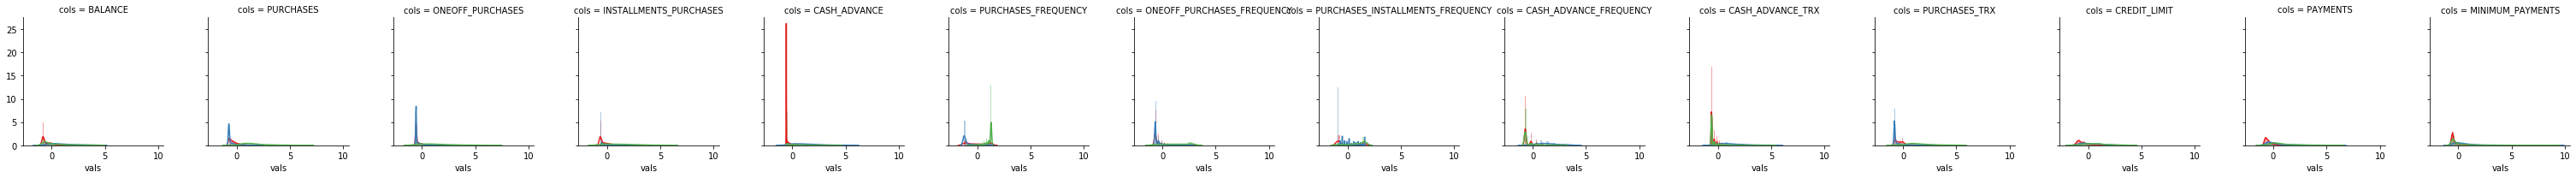

In [45]:
cols = list(data_standardized_df.columns)

df = data_standardized_df.melt(['cluster'], var_name='cols',  value_name='vals')

g = sns.FacetGrid(df, col='cols', hue="cluster", palette="Set1")

g = (g.map(sns.distplot, "vals"))

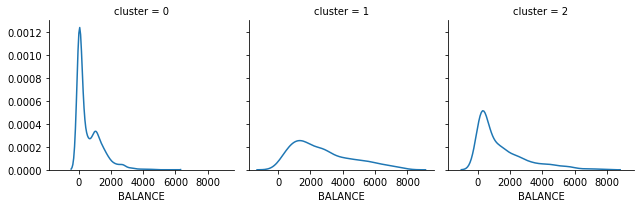

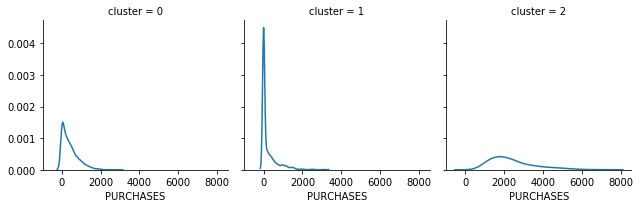

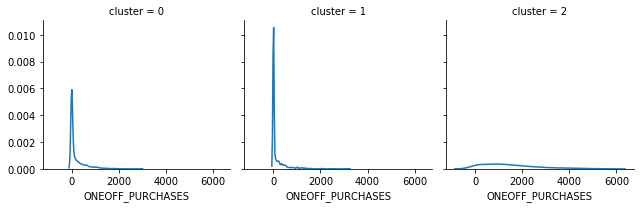

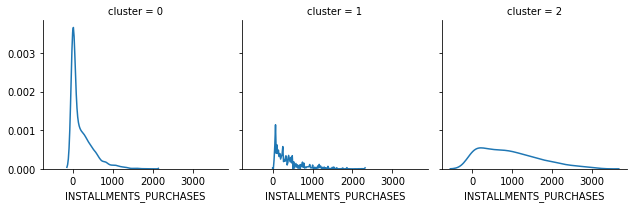

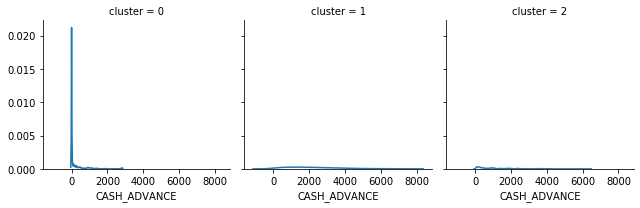

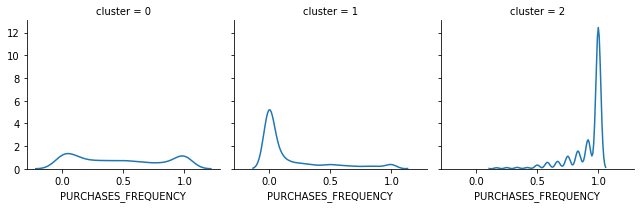

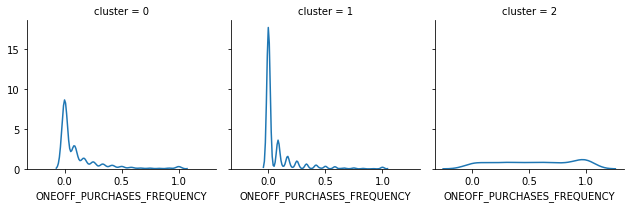

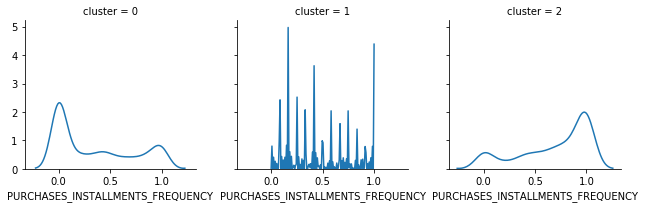

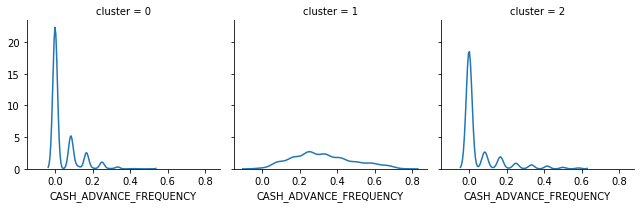

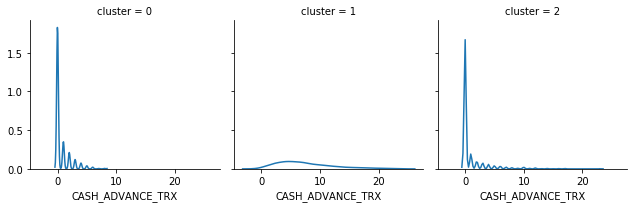

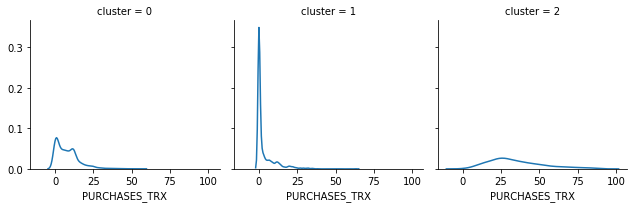

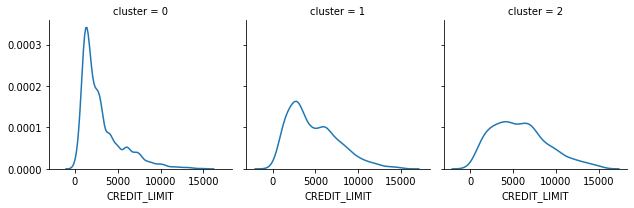

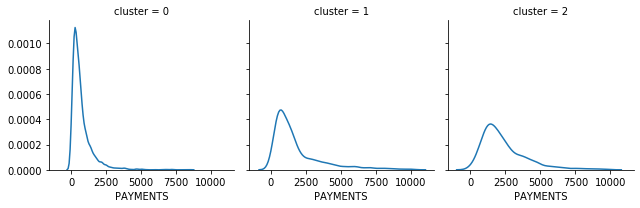

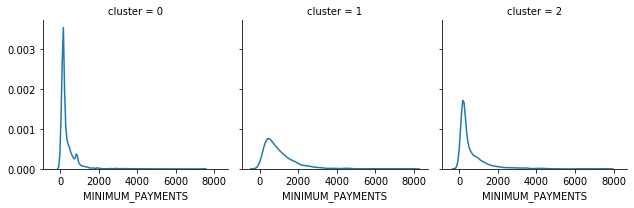

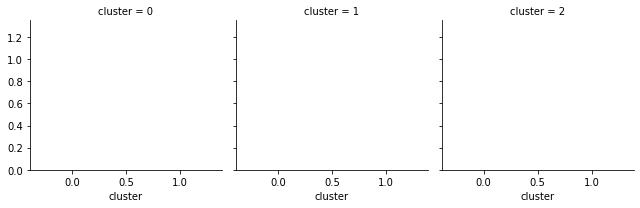

In [46]:
cols = list(df_cc_orig.columns)
for x in range(0,len(cols)):
    g = sns.FacetGrid(df_cc_orig, col='cluster')
    g = g.map(sns.kdeplot, cols[x])

In [47]:
data_standardized_df['cluster'].value_counts()

0    4327
1    1701
2    1406
Name: cluster, dtype: int64

#### Modeling: K Means summary
* Cluster 0: These are people with high balance and high installment purchases. These are also the people who makes payments however their payments are possibly minimum payments. These people also have high credit limit.
* Cluster 1: These are people who makes large purchases and a lot of one off purchases 
* Cluster 2: These people buys often, however their balances and purchases are not that high. That means they are purchases small items more frequently. They also don’t use much cash advances at all


Using PCA to identify the features that describes the best variance in the features

In [68]:
data_standardized_pca = data_standardized.copy()

In [69]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(data_standardized_pca) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2'] 
  
X_pca.head(2)

,P1,P2
0,-1.282653,-2.105132
1,-2.852109,3.595667


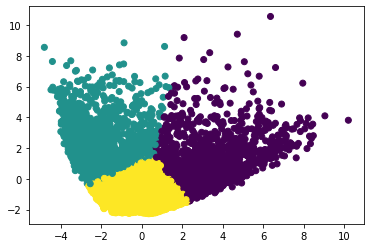

In [71]:
plt.scatter(X_pca['P1'], X_pca['P2'],
            c = KMeans(n_clusters=3, random_state=40).fit_predict(X_pca), cmap =None) 
plt.show()



In [72]:
print(pca.explained_variance_ratio_)

[0.34043743 0.23463708]


the first component describes 34.04% of the variabce in data and the 2nd 23.46% of the variance of the data. Total PCA describes about 58% of variance in the data. there is 42% of unknown variance in the data.


In [52]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_group=data_standardized_df.groupby('cluster').apply(lambda x: x[cols].mean()).T
cluster_group

cluster,0,1,2
BALANCE,-0.412762,0.957791,0.111534
PURCHASES,-0.324544,-0.504812,1.609520
ONEOFF_PURCHASES,-0.286528,-0.350481,1.305815
INSTALLMENTS_PURCHASES,-0.208025,-0.473844,1.213465
CASH_ADVANCE,-0.405186,1.267810,-0.286845
PURCHASES_FREQUENCY,-0.046384,-0.769321,1.073485
ONEOFF_PURCHASES_FREQUENCY,-0.245908,-0.387619,1.225735
PURCHASES_INSTALLMENTS_FREQUENCY,-0.022738,-0.639315,0.843429
CASH_ADVANCE_FREQUENCY,-0.420400,1.358833,-0.350145
CASH_ADVANCE_TRX,-0.412440,1.310259,-0.315876


In [53]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_group_orig=df_cc_orig.groupby('cluster').apply(lambda x: x[cols].mean()).T
cluster_group_orig

cluster,0,1,2
BALANCE,643.321200,2723.615674,1439.124032
PURCHASES,420.345154,235.502845,2403.481174
ONEOFF_PURCHASES,203.913416,153.165902,1467.450071
INSTALLMENTS_PURCHASES,216.856212,82.357354,936.099566
CASH_ADVANCE,171.450383,2238.021502,317.631440
PURCHASES_FREQUENCY,0.467363,0.180846,0.911192
ONEOFF_PURCHASES_FREQUENCY,0.121621,0.080865,0.544865
PURCHASES_INSTALLMENTS_FREQUENCY,0.348568,0.106499,0.688627
CASH_ADVANCE_FREQUENCY,0.042932,0.325416,0.054086
CASH_ADVANCE_TRX,0.689161,7.477954,1.069701


##  Hierarchical Clustering

In [73]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_standardized)

In [74]:
for cluster in range(2,15):
        agglomerative = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means,linkage = 'complete' : {:.3f}".format(cluster,sil_score))
        

Silhouette score for 2 cluster k-means,linkage = 'complete' : 0.167
Silhouette score for 3 cluster k-means,linkage = 'complete' : 0.122
Silhouette score for 4 cluster k-means,linkage = 'complete' : 0.119
Silhouette score for 5 cluster k-means,linkage = 'complete' : 0.124
Silhouette score for 6 cluster k-means,linkage = 'complete' : 0.119
Silhouette score for 7 cluster k-means,linkage = 'complete' : 0.096
Silhouette score for 8 cluster k-means,linkage = 'complete' : 0.139
Silhouette score for 9 cluster k-means,linkage = 'complete' : 0.110
Silhouette score for 10 cluster k-means,linkage = 'complete' : 0.120
Silhouette score for 11 cluster k-means,linkage = 'complete' : 0.080
Silhouette score for 12 cluster k-means,linkage = 'complete' : 0.083
Silhouette score for 13 cluster k-means,linkage = 'complete' : 0.075
Silhouette score for 14 cluster k-means,linkage = 'complete' : 0.078


Looks like 2 clusters has the highest silhouetee score

In [75]:
for cluster in range(2,15):
        agglomerative = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means, linkage = 'ward': {:.3f}".format(cluster,sil_score))

Silhouette score for 2 cluster k-means, linkage = 'ward': 0.280
Silhouette score for 3 cluster k-means, linkage = 'ward': 0.211
Silhouette score for 4 cluster k-means, linkage = 'ward': 0.166
Silhouette score for 5 cluster k-means, linkage = 'ward': 0.153
Silhouette score for 6 cluster k-means, linkage = 'ward': 0.157
Silhouette score for 7 cluster k-means, linkage = 'ward': 0.144
Silhouette score for 8 cluster k-means, linkage = 'ward': 0.156
Silhouette score for 9 cluster k-means, linkage = 'ward': 0.162
Silhouette score for 10 cluster k-means, linkage = 'ward': 0.103
Silhouette score for 11 cluster k-means, linkage = 'ward': 0.108
Silhouette score for 12 cluster k-means, linkage = 'ward': 0.110
Silhouette score for 13 cluster k-means, linkage = 'ward': 0.114
Silhouette score for 14 cluster k-means, linkage = 'ward': 0.112


In [76]:
for cluster in range(2,15):
        agglomerative = AgglomerativeClustering(linkage="average", affinity='cosine', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means, linkage = 'average': {:.3f}".format(cluster,sil_score))

Silhouette score for 2 cluster k-means, linkage = 'average': 0.215
Silhouette score for 3 cluster k-means, linkage = 'average': 0.181
Silhouette score for 4 cluster k-means, linkage = 'average': 0.157
Silhouette score for 5 cluster k-means, linkage = 'average': 0.151
Silhouette score for 6 cluster k-means, linkage = 'average': 0.082
Silhouette score for 7 cluster k-means, linkage = 'average': 0.092
Silhouette score for 8 cluster k-means, linkage = 'average': 0.102
Silhouette score for 9 cluster k-means, linkage = 'average': 0.109
Silhouette score for 10 cluster k-means, linkage = 'average': 0.099
Silhouette score for 11 cluster k-means, linkage = 'average': 0.099
Silhouette score for 12 cluster k-means, linkage = 'average': 0.102
Silhouette score for 13 cluster k-means, linkage = 'average': 0.048
Silhouette score for 14 cluster k-means, linkage = 'average': 0.046


### GMM

In [77]:
for cluster in range(2,20,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, gmm, metric='euclidean')
        print("Silhouette score for {} cluster k-means, using {} covariance is : {:.3f}".format(cluster,covariance_type,sil_score))
        

Silhouette score for 2 cluster k-means, using full covariance is : 0.069
Silhouette score for 2 cluster k-means, using tied covariance is : 0.224
Silhouette score for 2 cluster k-means, using diag covariance is : 0.162
Silhouette score for 2 cluster k-means, using spherical covariance is : 0.136
Silhouette score for 4 cluster k-means, using full covariance is : 0.092
Silhouette score for 4 cluster k-means, using tied covariance is : 0.190
Silhouette score for 4 cluster k-means, using diag covariance is : 0.088
Silhouette score for 4 cluster k-means, using spherical covariance is : 0.164
Silhouette score for 6 cluster k-means, using full covariance is : 0.048
Silhouette score for 6 cluster k-means, using tied covariance is : 0.184
Silhouette score for 6 cluster k-means, using diag covariance is : 0.037
Silhouette score for 6 cluster k-means, using spherical covariance is : 0.117
Silhouette score for 8 cluster k-means, using full covariance is : -0.013
Silhouette score for 8 cluster k-me

## DBSCAN

In [96]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))
for i in range(2,20):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized, clusters, metric='euclidean')
    print("Number of clusters and silhouette score when min_samples={} is: {} and {}".format(i, len(np.unique(clusters)),sil_score))

Number of clusters when min_samples=1 is: 2264
The silhouette score of the DBSCAN solution: -0.33265099950242066
Number of clusters and silhouette score when min_samples=2 is: 175 and -0.4141729676501979
Number of clusters and silhouette score when min_samples=3 is: 56 and -0.2849193920704393
Number of clusters and silhouette score when min_samples=4 is: 27 and -0.28697398231723004
Number of clusters and silhouette score when min_samples=5 is: 11 and -0.26923945596295507
Number of clusters and silhouette score when min_samples=6 is: 10 and -0.11907148839099563
Number of clusters and silhouette score when min_samples=7 is: 8 and -0.054275923628797317
Number of clusters and silhouette score when min_samples=8 is: 6 and -0.03784326368042193
Number of clusters and silhouette score when min_samples=9 is: 4 and 0.006852571821210626
Number of clusters and silhouette score when min_samples=10 is: 4 and -0.013288315652073591
Number of clusters and silhouette score when min_samples=11 is: 4 and 

In [103]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized, clusters, metric='euclidean')
    print("Number of clusters and silhouette score when eps={}  is: {} and {}".format(i, len(np.unique(clusters)),sil_score))

Number of clusters when eps=1 is: 2264
The silhouette score of the DBSCAN solution: -0.33265099950242066
Number of clusters and silhouette score when eps=0.01  is: 7433 and 0.00021128626497786174
Number of clusters and silhouette score when eps=0.1  is: 7173 and 0.025422487584514528
Number of clusters and silhouette score when eps=1  is: 2264 and -0.33265099950242066
Number of clusters and silhouette score when eps=2  is: 420 and -0.1770642526965036
Number of clusters and silhouette score when eps=3  is: 66 and 0.18264558042463713
Number of clusters and silhouette score when eps=4  is: 12 and 0.4599488769820144
Number of clusters and silhouette score when eps=5  is: 5 and 0.492267837657933
Number of clusters and silhouette score when eps=6  is: 2 and 0.6680844146080994


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Its giving me an error because silhoutte scores need to be starting at 2 so when the cluster hits 2, it gives an error. But I can see what I needed to see here - I wanted to see if DBscan will provide better results and I can see that with ep = 6 I get a 66% silhourtte score. I will run this with min sample 14 and ep = 6

In [97]:
dbscan_cluster = DBSCAN(eps=6, min_samples=14, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))

Number of clusters when min_samples=1 is: 2
The silhouette score of the DBSCAN solution: 0.6680844146080994


This gives me a 66% sihoutte score

# Summary

This project is about segmenting credit card users based on their credit card usage patterns. 
This is an unsupervised learning project since the target variable is continuous. I am trying to see how I can segment the customers based on various usage and properties of the credit card they use.

I start with 18 features. I cleaned the data for missing values. I used dropping columns as well as rows to handle missing values. 

I also used data explorations and use that to help clean the dataset. For example, a lot of the features such as Customer ID and such are irrelavant to identifying their spending habit. Those columns were dropped.

There are columns with missing values and I used mean of that column to fill in the missing values. I used histograms and boxplots to see if there were outliers and I used box cox to take care of outliers

After much data cleaning and exploration, I came down to 14 features that could be closely related to my segmentation problem. Once the dataset was ready, I used 4 unsupervised learning models - K means, Hierarchical clustering, GMM, and DBSCAN models and applied this dataset on all 4 of them. The results are as follows:

Out of all 4 models,DBSCAN seemed like it did the bes with the highest silhoutte score. 

- K Means: 24.2%

- Hierarchical Clustering
Complete: 16.7%
Ward:        28.0%
Average:   21.5%

-GMM
Full covariance: 06.9%
Tied covariance: 22.4%
Diag covariance: 16.2%
Spherical covariance: 13.6%

-DBSCAN               
ep=1, min_samples=14: 19.92%
eps=6, min_samples=14: 66.8%


I also had some recommendations for the Credit card company based on my models
The recommendations to the credit card company from the results would be
Cluster 0: Possibly decrease the interest rates for these people so they can make larger purchases and discounts on one off purchases
Cluster 1: increase the credit limit for these customers
Cluster 2: Decrease interest rate for cash advances and provide incentives for cash advances


The presentation for this project is here: https://docs.google.com/presentation/d/1G7DU14pq__Y8EAiu7yLQc-JIKzXYf5q40ChoRibgs4s/edit?usp=sharing
